# BIOS512 Assignment #4

🌬 For this assignment we are going to work with [Canada wind turbine](https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-10-27/readme.md) data from TidyTuesday. 💨

Use `read_csv` to load the data from the TidyTuesday GitHub repository. The project URL is can be found at [https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-10-27/](https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-10-27/).

In [1]:
library('tidyverse')
turbines = read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/refs/heads/master/data/2020/2020-10-27/wind-turbine.csv', col_types = cols())

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Each row in the table represents a single turbine.

In [2]:
colnames(turbines)
head(turbines)

[1] "objectid"                   "province_territory"        
 [3] "project_name"               "total_project_capacity_mw" 
 [5] "turbine_identifier"         "turbine_number_in_project" 
 [7] "turbine_rated_capacity_k_w" "rotor_diameter_m"          
 [9] "hub_height_m"               "manufacturer"              
[11] "model"                      "commissioning_date"        
[13] "latitude"                   "longitude"                 
[15] "notes"

objectid,province_territory,project_name,total_project_capacity_mw,turbine_identifier,turbine_number_in_project,turbine_rated_capacity_k_w,rotor_diameter_m,hub_height_m,manufacturer,model,commissioning_date,latitude,longitude,notes
<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
1,Alberta,Optimist Wind Energy,0.90,OWE1,1/2,150,23,30,Bonus,AN 150/30,1993,49.52535,-114.0548,NA
2,Alberta,Castle River Wind Farm,44.00,CRW1,1/60,600,44,40,Vestas,V44/600,1997,49.51264,-114.0357,NA
3,Alberta,Waterton Wind Turbines,3.78,WWT1,1/6,600,44,50,Vestas,V44/600,1998,49.23307,-113.6549,NA
4,Alberta,Waterton Wind Turbines,3.78,WWT2,2/6,600,44,50,Vestas,V44/600,1998,49.23303,-113.6302,NA
5,Alberta,Waterton Wind Turbines,3.78,WWT3,3/6,600,44,50,Vestas,V44/600,1998,49.21755,-113.6802,NA
6,Alberta,Waterton Wind Turbines,3.78,WWT4,4/6,660,47,50,Vestas,V47/660,2000,49.21773,-113.6579,NA


Make a bar chart 📊 **sorted by frequency** of turbine count per province territory. (Hint: `fct_infreq` will sort your factor levels by frequency for subsequent plotting)

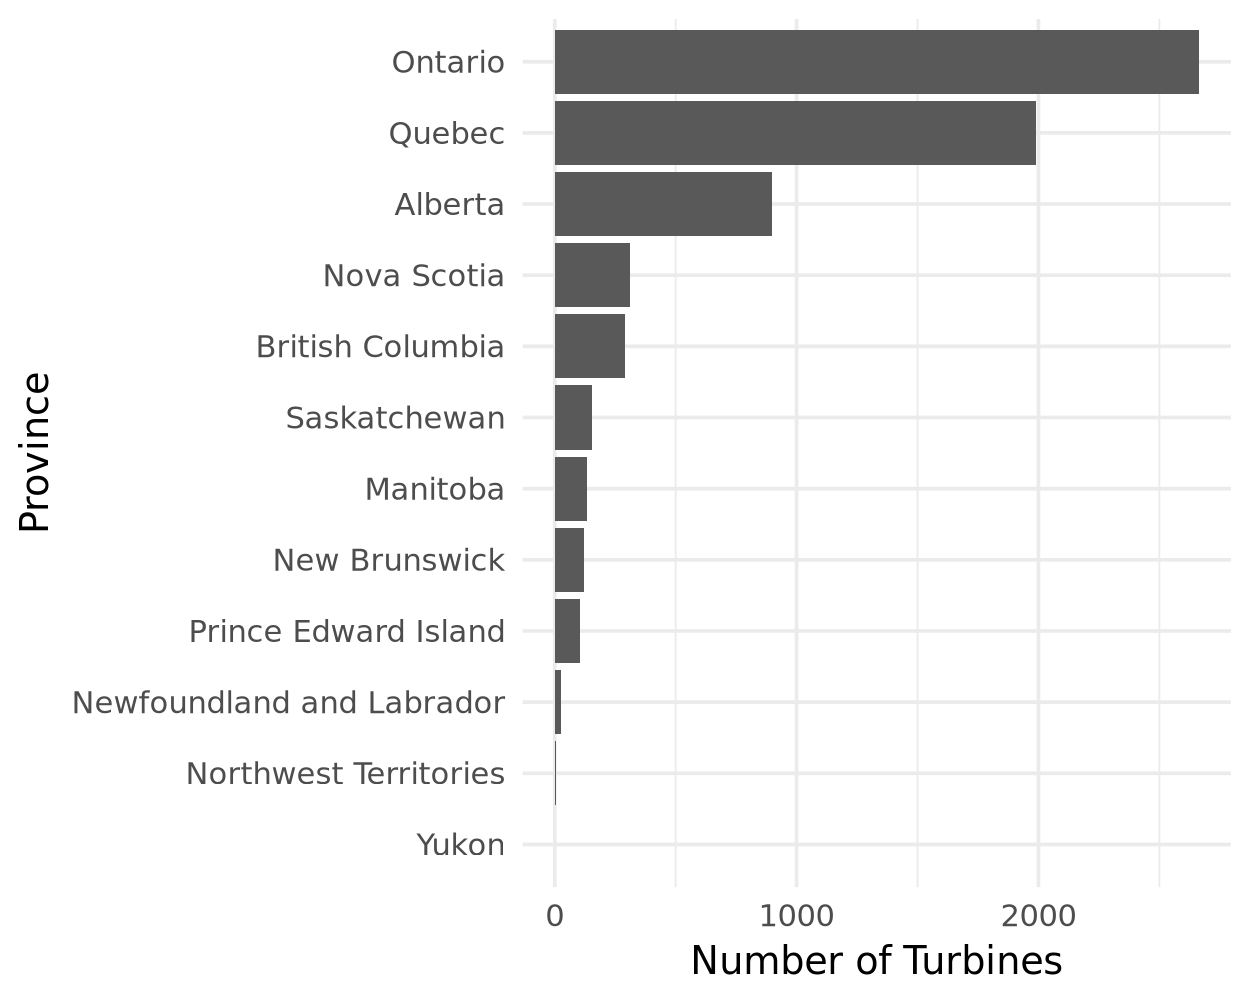

In [3]:
options(repr.plot.width =5, repr.plot.height = 4)
df= turbines |>
mutate(province_sort = fct_infreq(province_territory) |> fct_rev())

ggplot(df, aes(y = province_sort)) +
geom_bar()+ 
labs(
    x='Number of Turbines',
    y= 'Province') +
theme_minimal()

    

Make a bar chart **sorted by frequency** of turbine count per manufacturer. **Group the low frequency manufacturers into an `Other` category**.

**Bonus:** Can you force the `Other` category to be the last bar? 

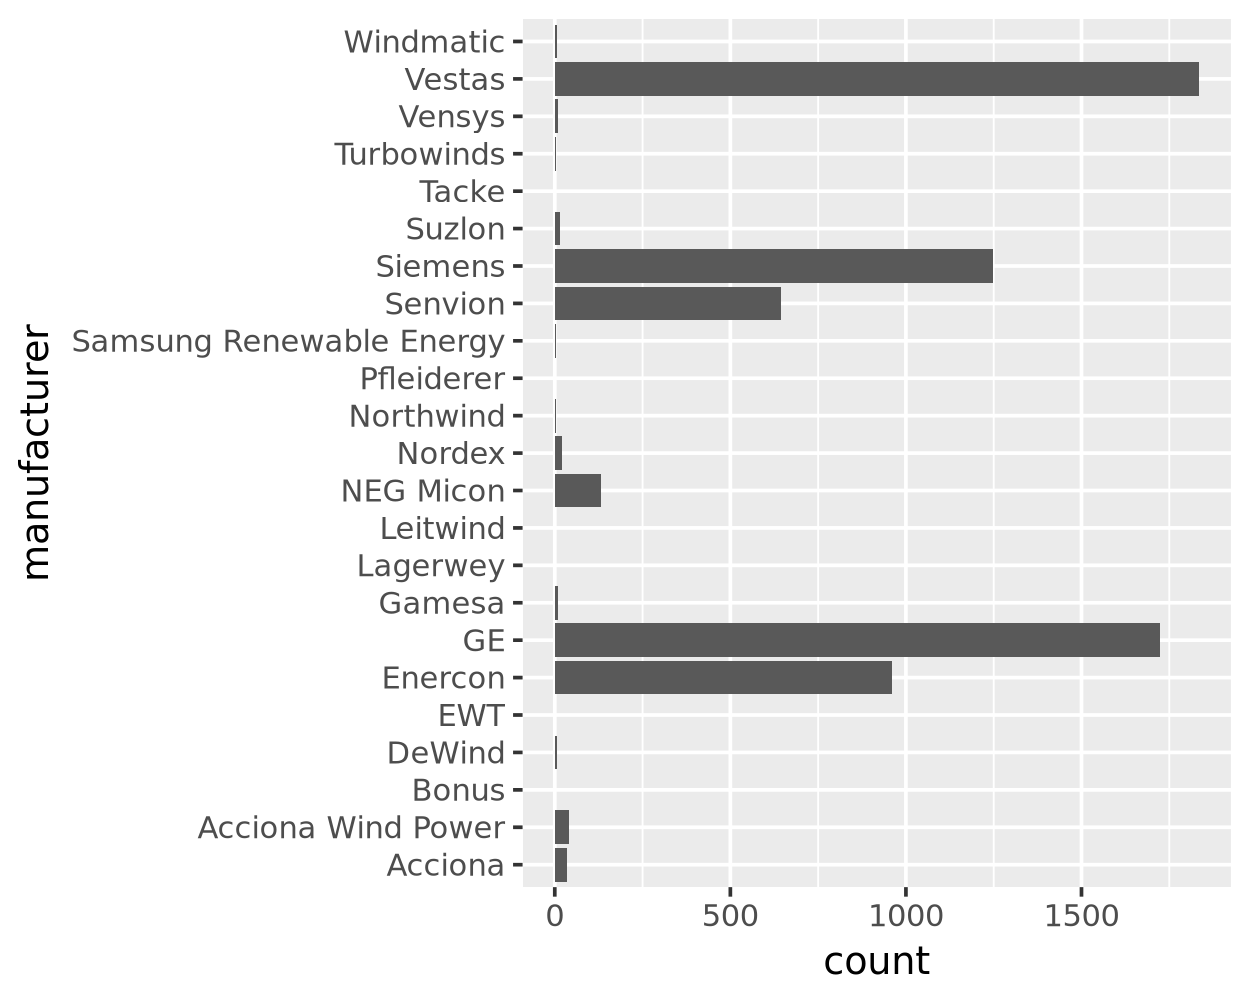

In [4]:
#first creating a bar chart of all manufacturers to see how many should be grouped into the other category
turbines |>
ggplot(aes(y = manufacturer)) + geom_bar()


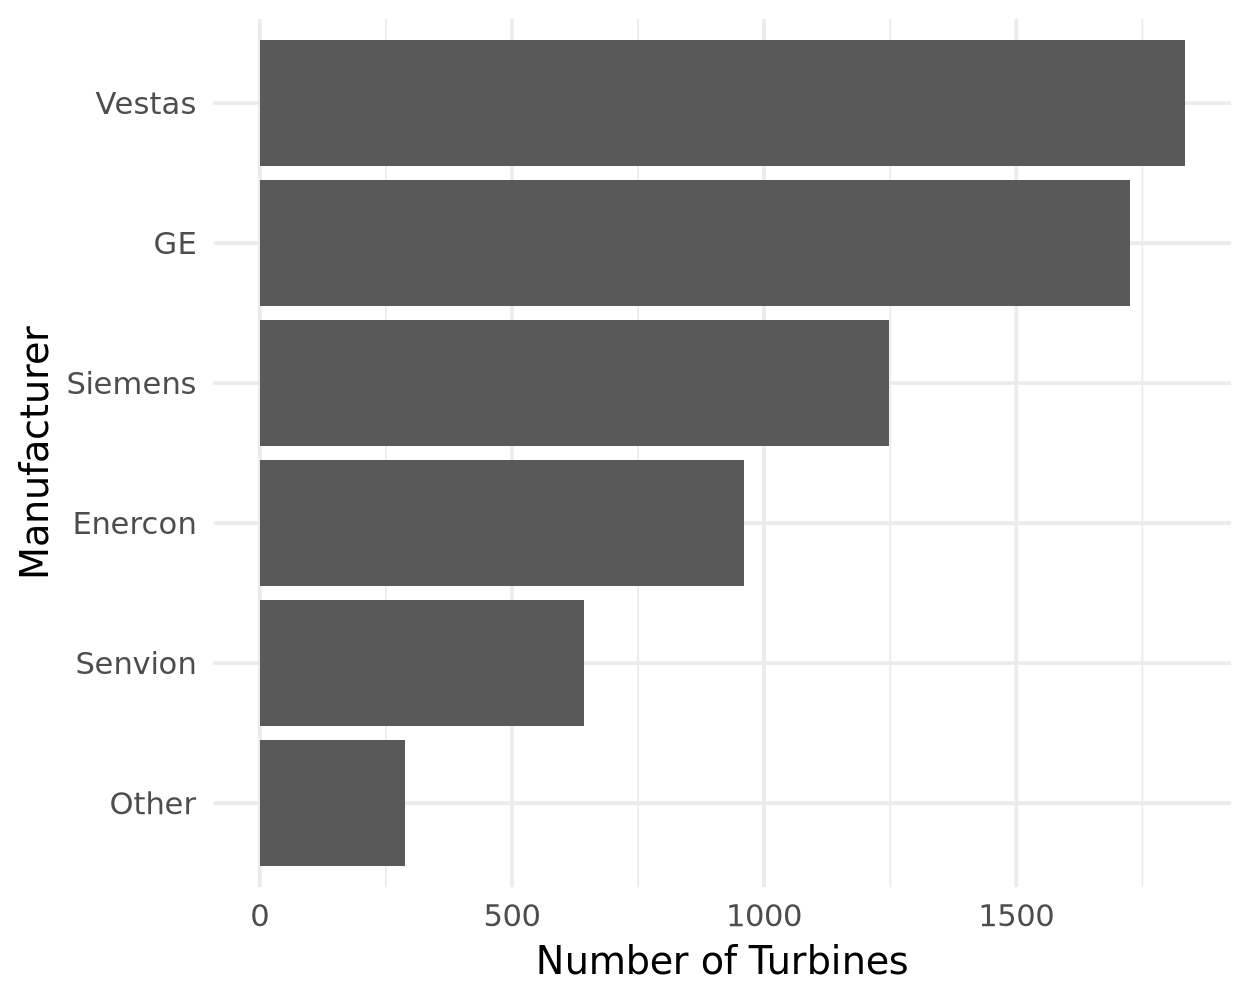

In [5]:
turbines |>
mutate(manufacturer = fct_lump(manufacturer, n =5)|>
    fct_infreq() |>
    fct_relevel('Other', after = Inf) |>
    fct_rev()) |>
ggplot(aes(y = manufacturer)) + 
    geom_bar()+
    labs(
    x='Number of Turbines',
    y= 'Manufacturer') +
    theme_minimal()



Let's make a map of where each turbine is located. 🗺️

In the cell below ⬇️ load the `mapdata` package.

In [6]:
library('mapdata')

Loading required package: maps


Attaching package: ‘maps’


The following object is masked from ‘package:purrr’:

    map




Now we can retrieve the "data" for a map of Canada. Run this code:

In [7]:
canada = map_data('world', region='Canada')  

Are the column names for `latitude` and `longitude` the same for your Canada map data and the turbine data?

In [8]:
colnames(canada)
colnames(turbines)

[1] "long"      "lat"       "group"     "order"     "region"    "subregion"

[1] "objectid"                   "province_territory"        
 [3] "project_name"               "total_project_capacity_mw" 
 [5] "turbine_identifier"         "turbine_number_in_project" 
 [7] "turbine_rated_capacity_k_w" "rotor_diameter_m"          
 [9] "hub_height_m"               "manufacturer"              
[11] "model"                      "commissioning_date"        
[13] "latitude"                   "longitude"                 
[15] "notes"

In the turbine data latitude and longitude are spelled out, while in the canada data they are abbreviated but they represent the same measure.

The code below creates a map of Canada. Modify the code to add the turbine locations. 

❗️ **Hint:** use `geom_point`. Remember to, 
1. define encodings inside of `geom_point` that work for the **turbine data**, and
2. to override the data in `geom_point` to use the **turbine data** instead of the **Canada map data**. ❗️

[This](https://github.com/chuckpr/BIOS512/blob/main/assignments/2024/map.png?raw=true) is what the map should look like...

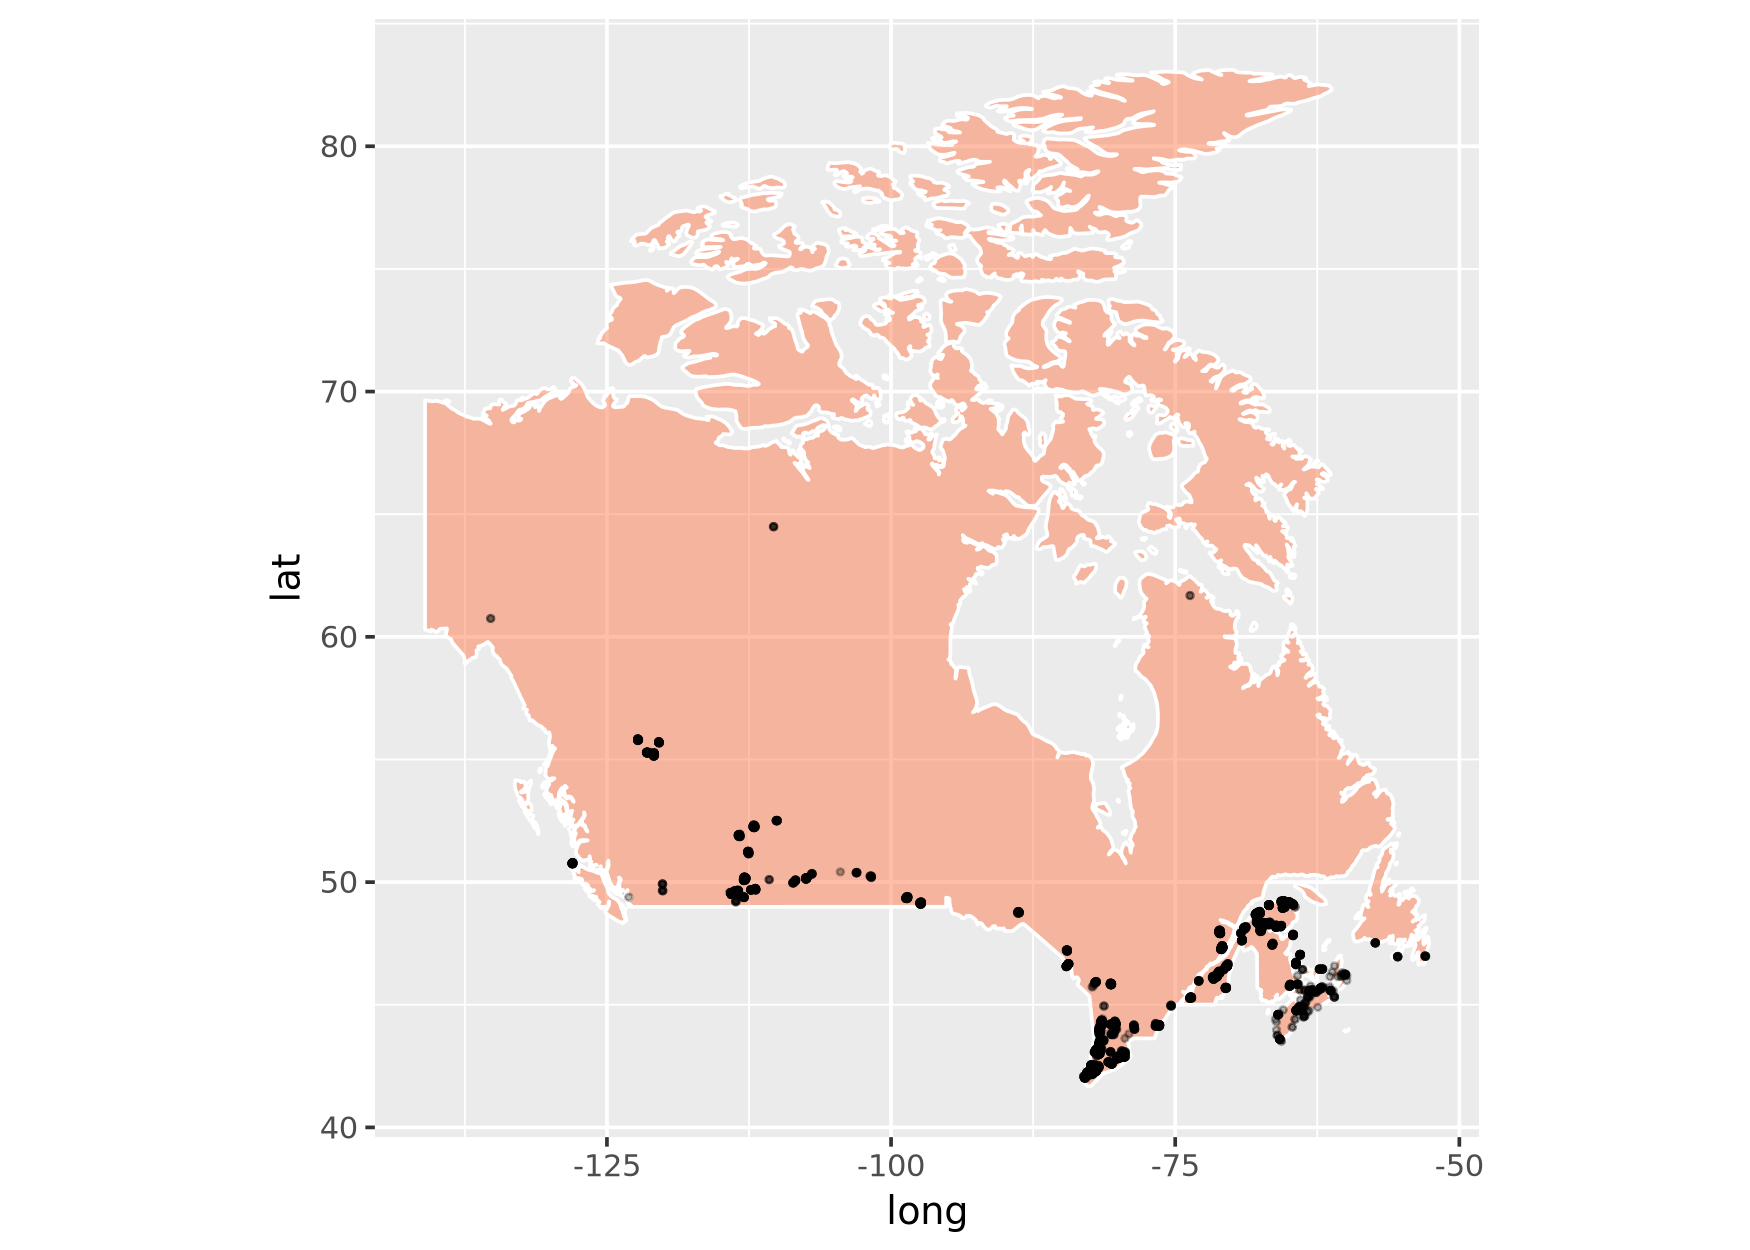

In [9]:
options(repr.plot.width = 7, repr.plot.height = 5)
ggplot(data = canada) + 
    geom_polygon(aes(x = long, y = lat, group = group), fill = 'coral', color = "white", alpha = 0.5) + 
    geom_point(turbines, mapping= aes(x = longitude, y = latitude), alpha = 0.3, size= 0.6)+
    coord_quickmap()